In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt","rb") as fp:
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
with open("test_qa.txt","rb") as fp:
    test_data = pickle.load(fp)

In [5]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
## analysis of data set
## 1. type of data set
print(type(train_data))
print(type(test_data))

<class 'list'>
<class 'list'>


In [7]:
## 2. size
print(len(train_data))
print(len(test_data))

10000
1000


In [8]:
train_data[0] # gives story qsn and answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0]) ## story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1]) ## qsn

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2] ## answer

'no'

In [12]:
## setup Vocabulary 
vocab = set()

In [13]:
all_data = test_data+train_data
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [14]:
type(all_data)

list

In [15]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [16]:
vocab.add("yes")
vocab.add("no")

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
len(vocab)

37

In [19]:
vocab_len = len(vocab)+1 ## for extra space to hold 0 for keras pad sequence
vocab_len

38

In [20]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [21]:
max_qsn_len = max([len(data[1]) for data in all_data])
max_qsn_len

6

In [22]:
## vectorize data set ==== covert to numerical from

In [23]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[])

In [25]:
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'milk': 1,
 'left': 2,
 'there': 3,
 'grabbed': 4,
 'the': 5,
 'football': 6,
 'sandra': 7,
 'discarded': 8,
 'is': 9,
 '?': 10,
 'daniel': 11,
 'no': 12,
 'back': 13,
 'dropped': 14,
 'office': 15,
 'yes': 16,
 'to': 17,
 'travelled': 18,
 'john': 19,
 'apple': 20,
 'picked': 21,
 'journeyed': 22,
 'moved': 23,
 'kitchen': 24,
 'down': 25,
 'put': 26,
 'bedroom': 27,
 'garden': 28,
 'hallway': 29,
 'went': 30,
 'got': 31,
 '.': 32,
 'in': 33,
 'bathroom': 34,
 'took': 35,
 'up': 36,
 'mary': 37}

In [27]:
train_story_text =[]
train_qsn_text = []
train_ans = []
for story,question,answer in train_data:
    train_story_text.append(story)
    train_qsn_text.append(question)
    

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [29]:
def vectorize_stories(data,word_index=tokenizer.word_index,
                      max_story_len = max_story_len,max_qsn_len = max_qsn_len):
    X =[]# story
    Xq = []## query qsn
    Y = []# correct answer
    for story,query,answer in data:
        x = [word_index[word.lower()]for word in story]
        xq = [word_index[word.lower()]for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X,maxlen = max_story_len),
           pad_sequences(Xq,maxlen = max_qsn_len),
           np.array(Y))
        

In [30]:
type(train_data)

list

In [31]:
input_train, queries_train, answers_train = vectorize_stories(train_data)

In [32]:
input_test, queries_test, answers_test = vectorize_stories(test_data)

In [33]:
input_train

array([[ 0,  0,  0, ...,  5, 27, 32],
       [ 0,  0,  0, ...,  5, 29, 32],
       [ 0,  0,  0, ...,  5, 34, 32],
       ...,
       [ 0,  0,  0, ...,  5, 27, 32],
       [ 0,  0,  0, ...,  1,  3, 32],
       [ 0,  0,  0, ..., 20,  3, 32]])

In [34]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
tokenizer.word_index['yes']

16

In [36]:
tokenizer.word_index['no']

12

In [37]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [38]:
input_sequence = Input((max_story_len,))
question = Input((max_qsn_len,))

In [39]:
## Input Encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len,output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [40]:
## Input Encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len,output_dim = max_qsn_len))
input_encoder_c.add(Dropout(0.3))

In [41]:
## qsn Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len,output_dim = 64, input_length = max_qsn_len))
question_encoder.add(Dropout(0.3))

In [42]:
## Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [43]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [44]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [45]:
## Concatenate
answer = concatenate([response,question_encoded])

In [46]:
## apply LSTM == Long Short Term Memory special kind of RNN
answer = LSTM(32)(answer)

In [47]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [48]:
answer = Activation('softmax')(answer)

In [49]:
## build final model
model = Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [51]:
## tarin the model
history = model.fit([input_train,queries_train],answers_train,batch_size=32,epochs=150,
                    validation_data = ([input_test,queries_test],answers_test))

Epoch 1/150
313/313 [==============================] - 23s 32ms/step - loss: 0.9247 - accuracy: 0.5066 - val_loss: 0.6954 - val_accuracy: 0.5030
Epoch 2/150
313/313 [==============================] - 8s 26ms/step - loss: 0.7071 - accuracy: 0.4938 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/150
313/313 [==============================] - 8s 25ms/step - loss: 0.6971 - accuracy: 0.4911 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 4/150
313/313 [==============================] - 8s 25ms/step - loss: 0.6952 - accuracy: 0.5022 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 5/150
313/313 [==============================] - 8s 25ms/step - loss: 0.6947 - accuracy: 0.4962 - val_loss: 0.6964 - val_accuracy: 0.4970
Epoch 6/150
313/313 [==============================] - 8s 26ms/step - loss: 0.6949 - accuracy: 0.4924 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 7/150
313/313 [==============================] - 8s 25ms/step - loss: 0.6945 - accuracy: 0.4997 - val_loss: 0.6966 - val_accuracy

313/313 [==============================] - 8s 25ms/step - loss: 0.2824 - accuracy: 0.8815 - val_loss: 0.3973 - val_accuracy: 0.8190
Epoch 58/150
313/313 [==============================] - 8s 25ms/step - loss: 0.2795 - accuracy: 0.8804 - val_loss: 0.3864 - val_accuracy: 0.8230
Epoch 59/150
313/313 [==============================] - 8s 26ms/step - loss: 0.2799 - accuracy: 0.8845 - val_loss: 0.3913 - val_accuracy: 0.8360
Epoch 60/150
313/313 [==============================] - 8s 27ms/step - loss: 0.2702 - accuracy: 0.8859 - val_loss: 0.3708 - val_accuracy: 0.8300
Epoch 61/150
313/313 [==============================] - 8s 26ms/step - loss: 0.2707 - accuracy: 0.8866 - val_loss: 0.3868 - val_accuracy: 0.8220
Epoch 62/150
313/313 [==============================] - 8s 26ms/step - loss: 0.2682 - accuracy: 0.8883 - val_loss: 0.3832 - val_accuracy: 0.8250
Epoch 63/150
313/313 [==============================] - 8s 26ms/step - loss: 0.2650 - accuracy: 0.8872 - val_loss: 0.3948 - val_accuracy: 0.819

313/313 [==============================] - 8s 25ms/step - loss: 0.1859 - accuracy: 0.9244 - val_loss: 0.5473 - val_accuracy: 0.8180
Epoch 114/150
313/313 [==============================] - 8s 26ms/step - loss: 0.1911 - accuracy: 0.9235 - val_loss: 0.5613 - val_accuracy: 0.8240
Epoch 115/150
313/313 [==============================] - 8s 26ms/step - loss: 0.1823 - accuracy: 0.9247 - val_loss: 0.5419 - val_accuracy: 0.8160
Epoch 116/150
313/313 [==============================] - 8s 26ms/step - loss: 0.1786 - accuracy: 0.9263 - val_loss: 0.5588 - val_accuracy: 0.8240
Epoch 117/150
313/313 [==============================] - 8s 26ms/step - loss: 0.1837 - accuracy: 0.9239 - val_loss: 0.5583 - val_accuracy: 0.8330
Epoch 118/150
313/313 [==============================] - 8s 27ms/step - loss: 0.1864 - accuracy: 0.9273 - val_loss: 0.5806 - val_accuracy: 0.8290
Epoch 119/150
313/313 [==============================] - 8s 26ms/step - loss: 0.1784 - accuracy: 0.9286 - val_loss: 0.5795 - val_accuracy:

In [52]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


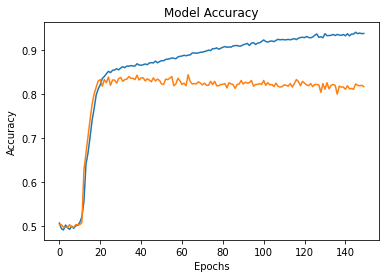

In [55]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

In [56]:
## saving the model
model.save("my_babi_chatbot_model")

INFO:tensorflow:Assets written to: my_babi_chatbot_model\assets


INFO:tensorflow:Assets written to: my_babi_chatbot_model\assets


In [57]:
## generate predicted results
pred_results = model.predict(([input_test,queries_test]))

32/32 [==============================] - 5s 9ms/step


In [62]:
story = ' '.join(word for word in test_data[15][0])
story

'John journeyed to the hallway . John got the apple there .'

In [63]:
query = ' '.join(word for word in test_data[15][1])
query

'Is John in the hallway ?'

In [64]:
test_data[15][2]

'yes'

In [66]:
## generate pred from model
val_max = np.argmax(pred_results[15])
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k=key
print("Predicted Answer is ",k)
print("Probability of Certainity is ",pred_results[15][val_max])

Predicted Answer is  yes
Probability of Certainity is  0.99244034
